In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/drive/My Drive/Projects_Colab/text summarize/data2.zip"  

Archive:  /content/drive/My Drive/Projects_Colab/text summarize/data2.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
df = pd.read_csv('Reviews.csv', nrows=10000)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
len(df['Summary']),len(df['Text'])

(10000, 10000)

In [ ]:
#text is summary 
#ctext is article

In [ ]:
df1 = pd.DataFrame({
    'text':df['Text'].values,'summary':df['Summary'].values
})

In [ ]:
len(df1['text'].values)

10000

In [ ]:
df1.isna().sum()

text       0
summary    0
dtype: int64

In [ ]:
df1.head()

,text,summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [ ]:

#Removes non-alphabetic characters:
import re
def text_strip(column):
    corpus = []
    for row in column:
        
        #ORDER OF REGEX IS VERY VERY IMPORTANT!!!!!!
        
        row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
        row=re.sub("(\\r)", ' ', str(row)).lower() 
        row=re.sub("(\\n)", ' ', str(row)).lower()
        
        row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
        row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
        row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
        row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
        row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
        
        row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
        
        row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
        row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
        row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
        row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
        
        
        row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
        row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
        row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
        
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
        
        #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
        try:
            url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
            repl_url = url.group(3)
            row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
        except:
            pass #there might be emails with no url in them
        

        
        row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces
        
        #Should always be last
        row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

        
        
        corpus.append(row)
    return corpus    

In [ ]:

brief_cleaning1 = text_strip(df1['text'])
brief_cleaning2 = text_strip(df1['summary'])

In [ ]:
len(brief_cleaning1),len(brief_cleaning2)

(10000, 10000)

In [ ]:
def add_start_end(list1):
  corpus=[]
  for i in list1:
    corpus.append("__START__ " + i + " __END__")
  return corpus

In [ ]:
brief_cleaning2 = add_start_end(brief_cleaning2)

In [ ]:
brief_cleaning2[3191]

'__START__ delicious low calorie and healthy snack good price too  __END__'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(brief_cleaning1,brief_cleaning2,test_size=0.33)

In [ ]:
len(X_train)

6700

In [ ]:
print(len(brief_cleaning1[10].split()))

143


In [ ]:
def find_max_len(list1):
  a = []
  for i in list1:
    a.append(len(i.split(" ")))
  return max(a)

max_len_size_text = 80
max_len_size_summary = 10
print(max_len_size_text) 

80


In [ ]:
y_train

['__START__ simple convenient __END__',
 '__START__ low calorie dental sticks __END__',
 '__START__ lazzaroni amarettini cookies __END__',
 '__START__ i like this stuff __END__',
 '__START__ expected better  __END__',
 '__START__ not as yummy as earth best other flavors __END__',
 '__START__ the price doubled  __END__',
 '__START__ my favorite flavor __END__',
 '__START__ potato bread __END__',
 '__START__ excellent crisps __END__',
 '__START__ great taste  __END__',
 '__START__ never paid that much  __END__',
 '__START__ awesome with some changes __END__',
 '__START__ best so far __END__',
 '__START__ outstanding bold lively sumatran best of the k-cups __END__',
 '__START__ real money saver  __END__',
 '__START__ believe the reviews way too salty __END__',
 '__START__ great product this is real garlic juice  __END__',
 '__START__ kitty junk food __END__',
 '__START__ detailed reply from company over infant feeding and dha/ara __END__',
 '__START__ so/so __END__',
 '__START__ best of t

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
text_tokenizer = Tokenizer(filters=[])
text_tokenizer.fit_on_texts(X_train)

X_tr = text_tokenizer.texts_to_sequences(X_train)
X_tes = text_tokenizer.texts_to_sequences(X_test)

from tensorflow.keras.preprocessing.sequence import pad_sequences
X_tr_pad = pad_sequences(X_tr,maxlen=max_len_size_text,padding="post")
X_tes_pad = pad_sequences(X_tes,maxlen=max_len_size_text,padding="post")

In [ ]:
X_tr_pad.shape

(6700, 80)

In [ ]:
vocab_size_text = len(text_tokenizer.word_index)

In [ ]:
def get_index(list1):
  index=[]
  for i in range(len(list1)):
    if(len(list1[i]) == 2):
      index.append(i)
  return index

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
sum_tokenizer = Tokenizer(filters=[])
sum_tokenizer.fit_on_texts(y_train)

y_tr = sum_tokenizer.texts_to_sequences(y_train)
y_tes = sum_tokenizer.texts_to_sequences(y_test)

from tensorflow.keras.preprocessing.sequence import pad_sequences
y_tr_pad = pad_sequences(y_tr,maxlen=max_len_size_summary,padding="post")
y_tes_pad = pad_sequences(y_tes,maxlen=max_len_size_summary,padding="post")

In [ ]:
index_2_tokens = get_index(y_tr)

In [ ]:
index_2_tokens


[4163]

In [ ]:
y_tr_pad.shape

(6700, 10)

In [ ]:
voc_size_sum = len(sum_tokenizer.word_index)

In [ ]:
voc_size_sum

4049

In [ ]:
print(X_tr_pad.shape)

(6700, 80)


In [ ]:
#Start telling
from tensorflow.keras.layers import Embedding,Input,LSTM,Dropout,TimeDistributed,Dense,Flatten
from tensorflow.keras.models import Model

latent_dim = 500
emb_dim_enc = vocab_size_text + 1
emb_dim_dec = voc_size_sum +1 

print(emb_dim_dec)



4050


In [ ]:

# Encoder
encoder_inputs = Input(shape=(max_len_size_text,))

#embedding layer
enc_emb =  Embedding(emb_dim_enc, 500,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.6,recurrent_dropout=0.6)
encoder_outputs, state_h, state_c = encoder_lstm2(encoder_output1)



In [ ]:
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(emb_dim_dec, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
 



#Dense layer
decoder_dense = TimeDistributed(Dense(emb_dim_dec, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_outputs) 



In [ ]:
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 500)      9470000     input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 80, 500), (N 2002000     embedding[0][0]                  
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="loss",patience=2)

In [ ]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy')

In [ ]:
history=model.fit([X_tr_pad,y_tr_pad[:,:-1]], y_tr_pad.reshape(y_tr_pad.shape[0],y_tr_pad.shape[1], 1)[:,1:] ,callbacks=[es],epochs=35,batch_size = 10,validation_data=([X_tes_pad,y_tes_pad[:,:-1]],y_tes_pad.reshape(y_tes_pad.shape[0],y_tes_pad.shape[1], 1)[:,1:]),verbose=1)

Epoch 1/35
670/670 [==============================] - 219s 327ms/step - loss: 2.4161 - val_loss: 2.3867
Epoch 2/35
670/670 [==============================] - 219s 327ms/step - loss: 2.3369 - val_loss: 2.3980
Epoch 3/35
670/670 [==============================] - 220s 328ms/step - loss: 2.2508 - val_loss: 2.4157
Epoch 4/35
670/670 [==============================] - 219s 327ms/step - loss: 2.1803 - val_loss: 2.4134
Epoch 5/35
670/670 [==============================] - 218s 326ms/step - loss: 2.0995 - val_loss: 2.4368
Epoch 6/35
670/670 [==============================] - 218s 326ms/step - loss: 2.0418 - val_loss: 2.4471
Epoch 7/35
670/670 [==============================] - 219s 326ms/step - loss: 1.9725 - val_loss: 2.4786
Epoch 8/35
670/670 [==============================] - 219s 327ms/step - loss: 1.9111 - val_loss: 2.4880
Epoch 9/35
670/670 [==============================] - 219s 327ms/step - loss: 1.8692 - val_loss: 2.5115
Epoch 10/35
670/670 [==============================] - 220s 329m

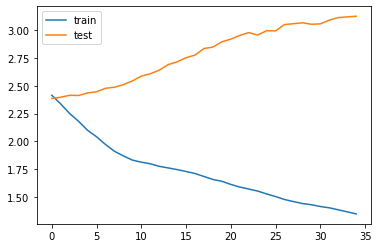

In [ ]:

from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [ ]:
reverse_target_word_index=sum_tokenizer.index_word 
reverse_source_word_index=text_tokenizer.index_word 
target_word_index=sum_tokenizer.word_index

In [ ]:
encoder_model = Model(inputs = encoder_inputs,outputs = [encoder_outputs,state_h,state_c])

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_size_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

decoder_outputs2 = decoder_dense(decoder_outputs2)
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_seq(input_seq):

  e_out,e_h,e_c = encoder_model.predict(input_seq)
  # Generate empty target sequence of length 1.
  target_seq = np.zeros((1,1))

  # Chose the 'start' word as the first word of the target sequence
  target_seq[0, 0] = target_word_index['__start__']
  stop_condition = False
  decoded_sentence = ''
  while not stop_condition:

    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    # Sample a token
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_token = reverse_target_word_index[sampled_token_index]

    if  (sampled_token!='__end__'):
        decoded_sentence += ' '+sampled_token
    if (sampled_token == '__end__' or len(decoded_sentence.split()) >= (max_len_size_summary-1)):
      stop_condition = True
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index

    # Update internal states
    e_h, e_c = h, c

  return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['__start__']) and i!=target_word_index['__end__']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
for i in range(len(X_tes_pad)):
  print("Review:",seq2text(X_tes_pad[i]))
  print("Original summary:",seq2summary(y_tes_pad[i]))
  print("Predicted summary:",decode_seq(X_tes_pad[i].reshape(1,max_len_size_text)))
  print("\n")

Streaming output truncated to the last 5000 lines.
Original summary: coffee pods 
Predicted summary:  not the best


Review: these are delicious and filling first had them in hawaii few weeks ago but then couldn find them when got back home to philly amazon had them and good selection if you are seed and nut eater and like crispy cracker you will love these enjoy 
Original summary: 
Predicted summary:  yummy


Review: making my water become murky water before my eyes that has to certainly be more bang for your buck for the level of antioxidants opposed to the old brewing way br have had very difficult journey until now finding yummy healthy quick unsweetened flavored teas my second favorite is the celestial seasonings cool brew bags the blueberry green tea is also delicious but not nearly as refined as this top shelf stash br am more flavors for my next order 
Original summary: yum yum yum 
Predicted summary:  excellent product


Review: loves this habenero sauce its very very flavorfu